In [39]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

data_path = "/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/so/"
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 5.691895645933333e-06,
    'w': -1
}

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['info', 'tile']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [40]:
snrcut = 5
from classy_sz import Class

cluster_settings = {

                   '100*theta_s':1.04135,
                   'omega_b':0.0226576,
                   'omega_cdm':0.1206864,
                   'A_s':2.022662e-9,
                   'tau_reio':0.055,
                   'n_s': 0.96605,

'output' : 'sz_cluster_counts',
'mass function' : 'M500',
'concentration parameter': 'B13',

'has_selection_function' : 1,
'experiment' : 1, # 1: simons observatory, 0: planck
'y_m_relation' : 1, # 1: Hasselfield et al, 0: Planck
    
'SO_thetas_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_120921_thetas.txt',
'SO_skyfracs_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_120921_skyfracs.txt',
'SO_ylims_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_120921_ylims.txt',
# X ray mass bias (if applicable -  default 1)
# 'B' : 1.,
    
'signal-to-noise cut-off for survey cluster completeness' : 5.,

# scaling law parameter

'B_ym': 0.08,
'A_ym': 4.35e-5,
'C_ym' : 0.,
'sigmaM_ym' : 0.0,

'M_min' : 1e13,
'M_max' : 5e15,


'YHe': 'BBN',

# 1 massive neutrino (planck 2018 baseline)
'N_ur': 2.0328,
'N_ncdm': 1,
'm_ncdm': 0.0,
'T_ncdm': 0.71611,


# #3 massive neutrinos
# N_ur : 0.00641
# N_ncdm : 1
# deg_ncdm : 3
# m_ncdm : 0.02
# T_ncdm : 0.71611




# Prescription for HMF to be used with massive neutrinos
# HMF_prescription_NCDM: 'CDM'


'bin_z_min_cluster_counts' : 0.,
'bin_z_max_cluster_counts' : 2.,
'bin_dz_cluster_counts' : 0.1,
    
'bin_dlog10_snr': 0.25,
'log10_snr_min':0.6,
'log10_snr_max':2.0,

'dlny' : 0.01,
'lnymin' : -11.,
'lnymax' : 10.,

'dlnM_cluster_count_completeness_grid' : 0.01,


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,

'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-1,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,

'mass_epsrel_cluster_counts' : 1e-3,
'mass_epsabs_cluster_counts' : 1e-30,

'redshift_epsrel_cluster_counts' : 1e-3,
'redshift_epsabs_cluster_counts' : 1e-30,

# # tabulation of mass function:
'n_z_dndlnM' : 150,
'n_m_dndlnM' : 150,

# # computation of mass function
# # (grid in mass and redshifts for sigma and dsigma)
'ndim_masses' : 250,
'ndim_redshifts' : 250,

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 20.,
'k_min_for_pk_class_sz' : 1e-3,
'k_max_for_pk_class_sz' : 1e1,

'P_k_max_h/Mpc' : 1e0,
'non linear': 'halofit'

}

In [3]:
# try:
#     cluster_settings.pop('non linear')
# except KeyError:
#     print('fine')
# cluster_settings['output'] = 'sz_cluster_counts'

In [4]:
M = Class()
M.set(cluster_settings)
M.set({
'output':'dndlnM,m200m_to_m500c',
'mass function' : 'T08',
'mass function': 'm200m_to_m500c'
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

# szcountsf90:
#[evaluate]  sigma8 = 0.810188
#[evaluate]  omegam = 0.309952
#[evaluate]  H0 = 68.0053

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


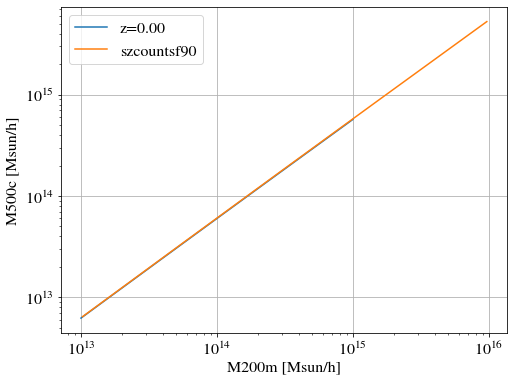

In [5]:
m500c = np.vectorize(M.get_m200m_to_m500c_at_z_and_M)
m = np.geomspace(1e13,1e15,100)
plt.plot(m,m500c(1.,m),label='z=%.2f'%0.)
m200me,m500ce = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/M200m_M500c_z1.txt',unpack=True)
plt.plot(m200me,m500ce,label='szcountsf90')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('M200m [Msun/h]')
plt.ylabel(r'M500c [Msun/h]')
plt.legend()


In [12]:
M = Class()
M.set(cluster_settings)
M.set({
'output':'dndlnM',
'mass function': 'M500'
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

# szcountsf90:
#[evaluate]  sigma8 = 0.810188
#[evaluate]  omegam = 0.309952
#[evaluate]  H0 = 68.0053

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


Text(0.5, 1.0, 'T08@M500c')

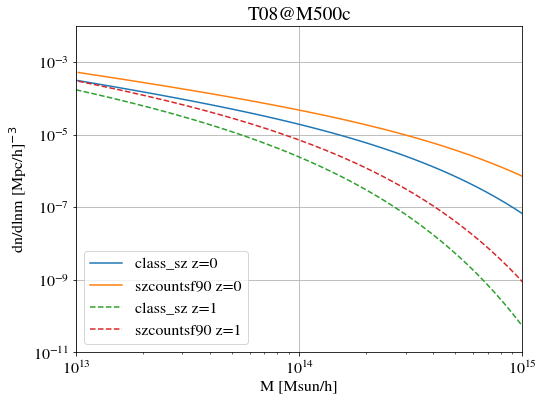

In [21]:
z = np.linspace(0.,4,5)
m = np.geomspace(1e13,1e15)
dn = np.vectorize(M.get_dndlnM_at_z_and_M) # mass in Msun/h and dndlnM in [Mpc/h]^-3
# for zz in z:
#     plt.plot(m,dn(zz,m),label='z=%.2f'%zz)
plt.plot(m,dn(0.,m),label='class_sz z=0')
me,dne = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/m_dndlnmdz_z0.txt',unpack=True)
plt.plot(exp(me),np.abs(dne),label='szcountsf90 z=0')

plt.plot(m,dn(1.,m),label='class_sz z=1',ls='--')
me,dne = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/m_dndlnmdz_z1.txt',unpack=True)
plt.plot(exp(me),np.abs(dne),label='szcountsf90 z=1',ls='--')
plt.loglog()
plt.grid()
plt.xlabel('M [Msun/h]')
plt.ylabel(r'dn/dlnm [Mpc/h]$^{-3}$')
plt.legend()
plt.ylim(1e-11,1e-2)
plt.xlim(1e13,1e15)
plt.title('T08@M500c')

In [41]:
M = Class()
M.set(cluster_settings)
M.set({
'mass function': 'T08'
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


Text(0.5, 1.0, 'T08@M200m')

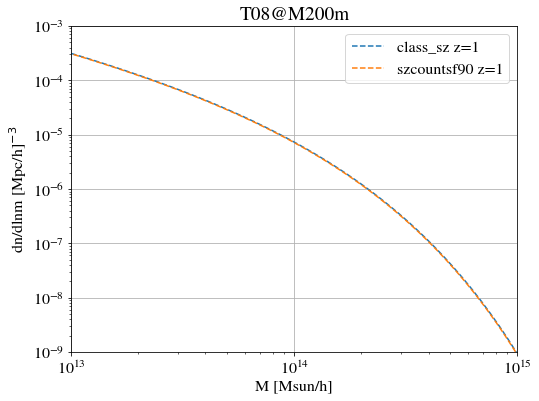

In [44]:
z = np.linspace(0.,4,5)
m = np.geomspace(1e13,1e15)
dn = np.vectorize(M.get_dndlnM_at_z_and_M) # mass in Msun/h and dndlnM in [Mpc/h]^-3
# for zz in z:
#     plt.plot(m,dn(zz,m),label='z=%.2f'%zz)
plt.plot(m,dn(1.,m),label='class_sz z=1',ls='--')
me,dne = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/m_dndlnm_M200m_z1_bis.txt',unpack=True)
plt.plot(me,np.abs(dne),label='szcountsf90 z=1',ls='--')

plt.loglog()
plt.grid()
plt.xlabel('M [Msun/h]')
plt.ylabel(r'dn/dlnm [Mpc/h]$^{-3}$')
plt.legend()
plt.ylim(1e-9,1e-3)
plt.xlim(1e13,1e15)
plt.title('T08@M200m')

In [6]:
M = Class()
M.set(cluster_settings)
M.set({

    
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


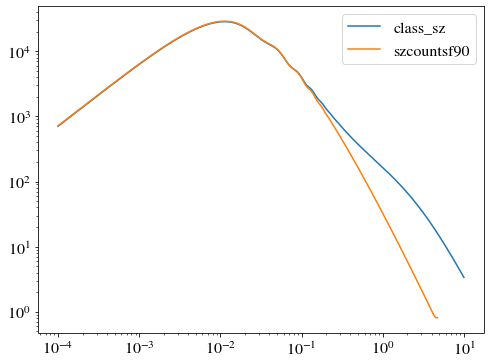

In [7]:
k_arr = np.geomspace(1e-4,1e1,1000)
z_arr = np.asarray([0.,1.,2.])
# the total matter pk (in Mpc**3) for a given k (in 1/Mpc) and z
matter_pk = np.vectorize(M.pk)
plt.plot(k_arr,matter_pk(k_arr,1.),label='class_sz')
ke,pke = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/k_pks_z1.txt',unpack=True)
plt.plot(ke,pke*M.h()**-3,label='szcountsf90')
plt.loglog()
plt.legend()

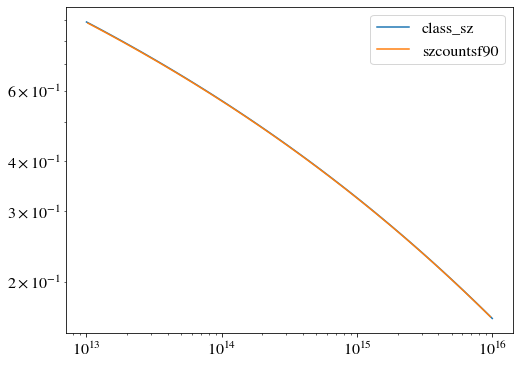

In [8]:
m_arr = np.geomspace(1e13,1e16,100)
get_sigma_at_z_and_m = np.vectorize(M.get_sigma_at_z_and_m)
plt.plot(m_arr,get_sigma_at_z_and_m(1.,m_arr),label='class_sz')
me,se = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/m_sigma_z1.txt',unpack=True)
plt.plot(exp(me),se,label='szcountsf90')
plt.loglog()
plt.legend()

In [45]:
# info = {
#     'params': params,
#     'likelihood': {'soliket.BinnedClusterLikelihood': {
#         'single_tile_test': "no",
#         'choose_dim': "1D",
#         'Q_optimise': "yes",
#         'stop_at_error': True,
#         'data_path': data_path,
#         'cat_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits",
#         'Q_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz",
#         'tile_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/tileAreas.txt",
#         'rms_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/downsampled.txt"}},
#     'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
# }
# 2D N calculation 

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
        'single_tile_test': "no",
        'choose_dim': "2D", # change option here 
        'Q_optimise': "yes",
        'stop_at_error': True,
        'data_path': data_path,
        'cat_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits",
        'Q_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz",
        'tile_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/tileAreas.txt",
        'rms_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/downsampled.txt"}},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

[CAMB] Importing *auto-installed* CAMB (but defaulting to *global*).
[camb] Initialized!
 :::::: this is initialisation in binned_clusters.py
 :::::: reading catalogue
 Number of mass bins :  138
 SO for a full map
 2D likelihood as a function of redshift and signal-to-noise
 Total number of clusters in catalogue =  62475
 SNR cut =  5.0
 Number of clusters above the SNR cut =  43232
 The highest redshift = 2.62
 Number of redshift bins =  27
 Catalogue N
0 316.0
1 2175.0
2 4000.0
3 5081.0
4 5369.0
5 5253.0
6 4587.0
7 3992.0
8 3233.0
9 2565.0
10 1912.0
11 1418.0
12 1104.0
13 734.0
14 526.0
15 341.0
16 226.0
17 155.0
18 101.0
19 60.0
20 40.0
21 22.0
22 11.0
23 4.0
24 6.0
25 0.0
26 1.0
27 0.0
43232.0
 The lowest SNR = 5.00
 The highest SNR = 93.46
 Number of SNR bins =  6
 Edges of SNR bins =  [  3.98107171   7.07945784  12.58925412  22.38721139  39.81071706
  70.79457844 125.89254118]
 Catalogue N in SNR bins
 0 24950.0
 1 14092.0
 2 3454.0
 3 642.0
 4 90.0
 5 4.0
 6 0.0
 :::::: loading

array([-494.42687935])

In [46]:
# # initialisation 
# model = get_model(info)
# like = model.likelihood['soliket.BinnedClusterLikelihood']
# model.loglikes({})[0]
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)

In [47]:

SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.    
}
Nz = like._get_theory(pk_intp, **SZparams)

 Total predicted 2D N =  43193.12756602195
 ::: theory N calculation took 26.6 seconds


In [48]:
z, catNz =  like.delNcat

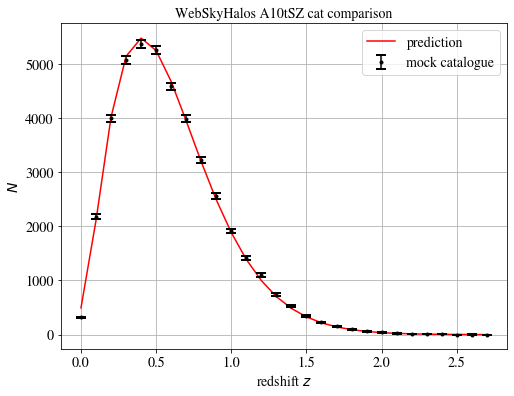

In [49]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz.sum(axis=1), 'r-', label='prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

In [50]:
# Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

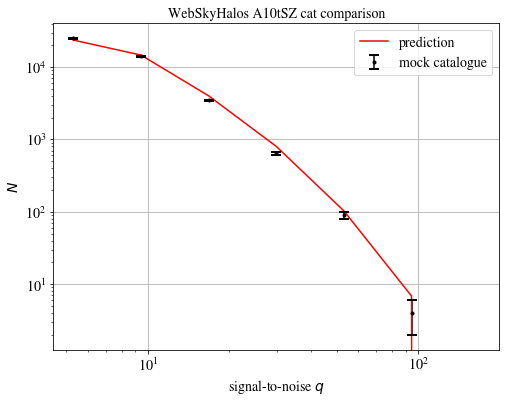

In [51]:
Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
   Nq[i] = Nz[:,i].sum()    
   catNq[i] = catNzq[:,i].sum()

plt.figure(figsize=(8,6))
plt.plot(10**q, Nq, 'r-', label='prediction')
plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

In [52]:
quick_theta_Q = np.load(data_path+"MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz")

In [53]:
snrcut = 5
from classy_sz import Class
M = Class()
cluster_settings = {

                   '100*theta_s':1.04135,
                   'omega_b':0.0226576,
                   'omega_cdm':0.1206864,
                   'A_s':2.022662e-9,
                   'tau_reio':0.055,
                   'n_s': 0.96605
}


M.set(cluster_settings)
M.set({
'output' : 'sz_cluster_counts',
'mass function' : 'T08',
'concentration parameter': 'B13',

'has_selection_function' : 1,
'experiment' : 1, # 1: simons observatory, 0: planck
'y_m_relation' : 1, # 1: Hasselfield et al, 0: Planck
    
'SO_thetas_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_120921_thetas.txt',
'SO_skyfracs_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_120921_skyfracs.txt',
'SO_ylims_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_120921_ylims.txt',
# X ray mass bias (if applicable -  default 1)
# 'B' : 1.,
    
'signal-to-noise cut-off for survey cluster completeness' : 5.,

# scaling law parameter

'B_ym': 0.08,
'A_ym': 4.35e-5,
'C_ym' : 0.,
'sigmaM_ym' : 0.0,

'M_min' : 1e13,
'M_max' : 1e16,


'YHe': 'BBN',

# 1 massive neutrino (planck 2018 baseline)
'N_ur': 2.0328,
'N_ncdm': 1,
'm_ncdm': 0.0,
'T_ncdm': 0.71611,


# #3 massive neutrinos
# N_ur : 0.00641
# N_ncdm : 1
# deg_ncdm : 3
# m_ncdm : 0.02
# T_ncdm : 0.71611




# Prescription for HMF to be used with massive neutrinos
# HMF_prescription_NCDM: 'CDM'


'bin_z_min_cluster_counts' : 0.,
'bin_z_max_cluster_counts' : 2.,
'bin_dz_cluster_counts' : 0.1,
    
'bin_dlog10_snr': 0.25,
'log10_snr_min':0.6,
'log10_snr_max':2.0,

'dlny' : 0.01,
'lnymin' : -11.,
'lnymax' : 10.,

'dlnM_cluster_count_completeness_grid' : 0.01,


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,

'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-1,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,

'mass_epsrel_cluster_counts' : 1e-3,
'mass_epsabs_cluster_counts' : 1e-30,

'redshift_epsrel_cluster_counts' : 1e-3,
'redshift_epsabs_cluster_counts' : 1e-30,

# # tabulation of mass function:
'n_z_dndlnM' : 150,
'n_m_dndlnM' : 150,

# # computation of mass function
# # (grid in mass and redshifts for sigma and dsigma)
'ndim_masses' : 250,
'ndim_redshifts' : 250,

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 20.,
'k_min_for_pk_class_sz' : 1e-3,
'k_max_for_pk_class_sz' : 1e1,

'P_k_max_h/Mpc' : 1e0,
'non linear': 'halofit'
    
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())



h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


In [54]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']
# M.struct_cleanup()
# M.empty()

In [55]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))



In [56]:

# here puth the path to the directory : e.g. MFMF_SOSim_3freq_tiles
path_to_catalogue = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/'
from astropy.io import fits
tcat = path_to_catalogue+'MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits'
list = fits.open(tcat)
data = list[1].data
zc = data.field("redshift")
snr = data.field("SNR")
tile = data.field("tileName")

zc = zc[snr > snrcut]
snr = snr[snr > snrcut]
sf = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_191121_skyfracs.txt')
print('sky fraction:',sf.sum())



sky fraction: 0.4335327806600558


In [57]:
M.sigma8()

0.8097110595775384

(0.0, 2.0)

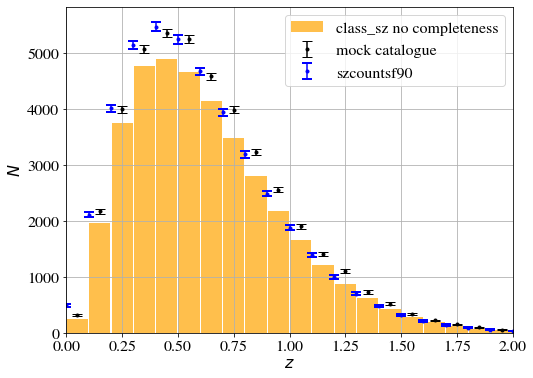

In [64]:
N_clusters_z, xedges = np.histogram(zc, bins=z_edges)
plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='mock catalogue',capsize=5,c='k')
# 41253./599.?
sf = 41253./599.
n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='orange',alpha=0.7, rwidth=0.95,label='class_sz no completeness')

# ze,nze = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/z_N.txt',unpack=True)
# plt.plot(ze,nze,label='szcountsf90')
# plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
# plt.errorbar(z_nemo,Nz_selfn,yerr=np.sqrt(Nz_selfn),marker='o',markersize=3.,ls='none',label=r'Nemo (Matt H)',capsize=5,c='b')
plt.errorbar(z, Nz.sum(axis=1), yerr=np.sqrt(Nz.sum(axis=1)), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='szcountsf90')




plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
# plt.yscale('log')
# plt.ylim(1e0,6.e7)
plt.xlim(0.,2.)

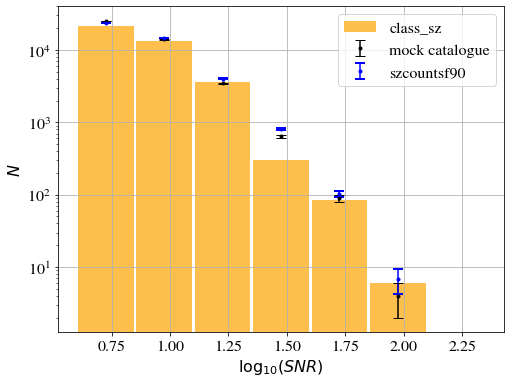

In [66]:
N_clusters_y, xedges = np.histogram(np.log10(snr), bins=log10y_edges)
plt.errorbar(log10y_center,N_clusters_y,yerr=np.sqrt(N_clusters_y),marker='o',markersize=3.,ls='none',label='mock catalogue',capsize=5,c='k')
n, bins, patches = plt.hist(x=np.repeat(log10y_center,N_clusters_y_theory), bins=log10y_edges, color='orange',alpha=0.7, rwidth=0.95, label='class_sz')
plt.errorbar(q, Nq, yerr=np.sqrt(Nq), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='szcountsf90')

# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')



plt.grid()
plt.legend()
plt.xlabel(r'$\log_{10}(SNR)$')
plt.ylabel(r'$N$')
plt.yscale('log')

In [33]:
# from nemo import *
# path_to_selfn = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/'


# configFileName=path_to_selfn+'config.yml'
# selFnDir=path_to_selfn
# SNRCut=5.
# zStep=0.1
# footprintLabel=None

# print(">>> Setting up SNR > %.2f selection function ..." % (SNRCut))
# selFn=completeness.SelFn(selFnDir, SNRCut, configFileName = configFileName, 
#                          footprintLabel = footprintLabel, zStep = zStep)

# scalingRelationDict=selFn.scalingRelationDict
# H0, Om0, Ob0, sigma8, ns = M.h()*100., M.Omega_m(),M.Omega_b()*M.h()**2., M.sigma8(), M.n_s()
# h=H0/100.0
# selFn.update(H0, Om0, Ob0, sigma8, ns, scalingRelationDict = scalingRelationDict)
# print("Total area = %.3f square degrees" % (selFn.totalAreaDeg2))

# # N(z) with M500c > 5e13 MSun - no selection function applied
# countsByRedshift=selFn.mockSurvey.clusterCount[:, np.greater(selFn.mockSurvey.log10M, np.log10(5e13/h))].sum(axis = 1)
# z_nemo = []
# Nz_noselfn = []
# Nz_selfn = []

# # with open("NzCheck_noSelFn.csv", "w") as outFile:
# for i in range(len(selFn.mockSurvey.z)):
#     z_nemo.append((selFn.mockSurvey.zBinEdges[i]+selFn.mockSurvey.zBinEdges[i+1])/2.)
#     Nz_noselfn.append(countsByRedshift[i])
# #     print("%.1f <= z < %.1f\t%.3f\n" % (selFn.mockSurvey.zBinEdges[i], selFn.mockSurvey.zBinEdges[i+1], countsByRedshift[i]))

# # N(z) with M500c > 5e13 MSun - with S/N > 5 selection function applied
# predMz=selFn.compMz*selFn.mockSurvey.clusterCount
# countsByRedshift=predMz[:, np.greater(selFn.mockSurvey.log10M, np.log10(5e13*h))].sum(axis = 1)
# # with open("NzCheck_withSelFn.csv", "w") as outFile:
# for i in range(len(selFn.mockSurvey.z)):
# #     z.append(selFn.mockSurvey.zBinEdges[i]+selFn.mockSurvey.zBinEdges[i+1])/2.)
#     Nz_selfn.append(countsByRedshift[i])
# #     print("%.1f <= z < %.1f\t%.3f\n" % (selFn.mockSurvey.zBinEdges[i], selFn.mockSurvey.zBinEdges[i+1], countsByRedshift[i]))

